#### Predicting the sale price of Bulldozers using Machine Learning

In this notebook we are going to build a machine learning project with the goal of predicting te sale price of Bulldozers

### Problem Definition

How well can we predict the future sale price of a Bulldozer given its charechteristics and previous examples of how much similar Bulldozers have been sold for ?

#### Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition

There are 3 main datasets:
* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout   the   majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

### Evaluation 
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices. for more check : https://www.kaggle.com/c/bluebook-for-bulldozers/overview

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE

### Features
 Kaggle provides a data dictionary detailing all of the features of the dataset.You can view this data dictionary on google sheets






In [381]:
#Importing the necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score
from sklearn.model_selection import RandomizedSearchCV

In [382]:
# importing training and validation sets

df = pd.read_csv('/Users/aravinds/Documents/skit/data/bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [383]:
df.info

<bound method DataFrame.info of         SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
412693  6333344    10000.0    1919201    21435         149           2.0   
412694  6333345    10500.0    1882122    21436         149           2.0   
412695  6333347    12500.0    1944213    21435         149           2.0   
412696  6333348    10000.0    1794518    21435         149           2.0   
412697  6333349    13000.0    1944743    21436         149           2.0   

        YearMade  MachineHoursCurrentMeter UsageBand   

In [384]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

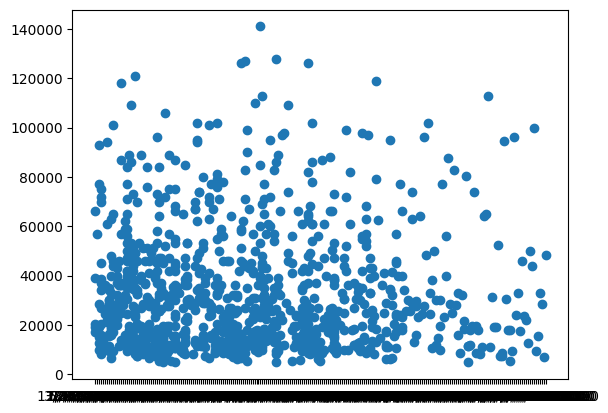

In [385]:
fig,ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);


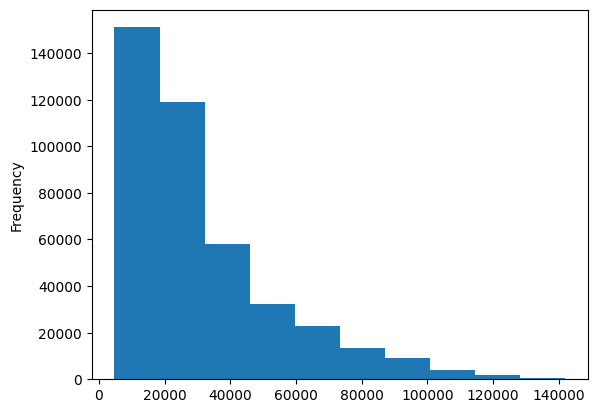

In [386]:
df.SalePrice.plot.hist();

### Parsing data 
when we work with time series data, we want to enrich the time and date component as much as possible

We can do this by telling pandas which of our columns has dates in it using the parse_dates parameter

In [387]:
# Date time object in pandas
df = pd.read_csv('/Users/aravinds/Documents/skit/data/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory=False,parse_dates=['saledate'])
df['saledate'][:100]


0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

In [388]:
df['saledate'].dtype

dtype('<M8[ns]')

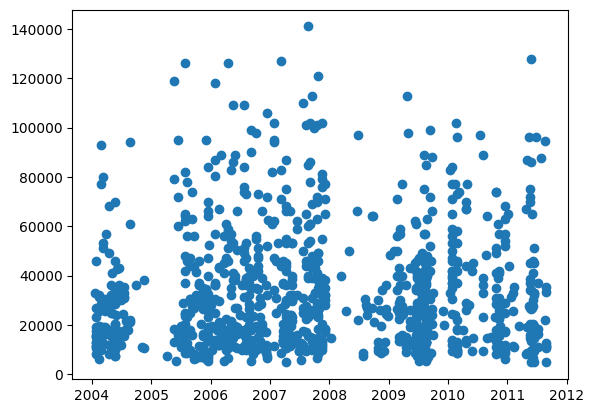

In [389]:
fig,ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [390]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [391]:
### sort data frame by sale date
'''when working with time series data its a good idea to sort it by date'''


df.sort_values(by=['saledate'],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [392]:
### make copy of the original data frame
''' so when we manipulate the the df, we will still have copy in case if we want to revert back'''

df_temp  = df.copy()

In [393]:
# Add date time parameters for saledate column
df_temp['saleyear'] = df_temp.saledate.dt.year
df_temp['salemonth'] = df_temp.saledate.dt.month
df_temp['saleday'] = df_temp.saledate.dt.day
df_temp['saledayofweek'] = df_temp.saledate.dt.dayofweek
df_temp['saledayofyear'] = df_temp.saledate.dt.dayofyear

df_temp.head().T


,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [394]:
# now as we have enriched the df with date time feaures, so we dont need have saledate column anymore
df = df.drop('saledate',axis =1)

### Modelling

In [395]:
### Modelling
model = RandomForestRegressor(n_jobs = -1,random_state=42)

In [396]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [397]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [398]:
# Converting  strings into pandas categories
string_cols = df_temp.select_dtypes(include=['object']).columns
string_cols

Index(['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [399]:
df_temp[string_cols] = df[string_cols].astype('category')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 12  fi

In [400]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Filling Missing values

In [401]:
# Filling numeric missing values

num_cols = df_temp.select_dtypes(include =['int64','float64']).columns
num_cols

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter'],
      dtype='object')

In [402]:
df_temp[num_cols].isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
dtype: int64

In [403]:
for col in num_cols:
    df_temp[col + '_is_missing'] = df_temp[col].isnull().astype(int)
    df_temp[col] = df_temp[col].fillna(df_temp[col].median())



In [404]:
df_temp[num_cols].isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
dtype: int64

In [405]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
ModelID_is_missing,0,0,0,0,0
datasource_is_missing,0,0,0,0,0
auctioneerID_is_missing,0,0,0,0,0
YearMade_is_missing,0,0,0,0,0


In [406]:
df_temp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
0    392562
1     20136
Name: count, dtype: int64

In [407]:
df_temp[string_cols].isna().sum()

UsageBand                  339028
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc            140727
fiModelSeries              354031
fiModelDescriptor          337882
ProductSize                216605
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System               305611
Enclosure                     334
Forks                      214983
Pad_Type                   331602
Ride_Control               259970
Stick                      331602
Transmission               224691
Turbocharged               331602
Blade_Extension            386715
Blade_Width                386715
Enclosure_Type             386715
Engine_Horsepower          386715
Hydraulics                  82565
Pushblock                  386715
Ripper                     305753
Scarifier                  386704
Tip_Control                386715
Tire_Size                  315060
Coupler       

In [408]:
# turn categorical varialbles into numbers and fill missing
for col in string_cols:
    
    df_temp[col + '_is_missing'] = df_temp[col].isnull().astype(int) # Create binary missing indicator column
    df_temp[col] = df_temp[col].astype('category').cat.codes

/var/folders/r2/g26jvc3x32jfw93vlbd3whh00000gn/T/ipykernel_872/2805252316.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_temp[col + '_is_missing'] = df_temp[col].isnull().astype(int) # Create binary missing indicator column
/var/folders/r2/g26jvc3x32jfw93vlbd3whh00000gn/T/ipykernel_872/2805252316.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_temp[col + '_is_missing'] = df_temp[col].isnull().astype(int) # Create binary missing indicator column
/var/folders/r2/g26jvc3x32jfw93vlbd3whh00000gn/T/ipykernel_872/2805252

In [409]:
df_temp[string_cols].isna().sum()

UsageBand                  0
fiModelDesc                0
fiBaseModel                0
fiSecondaryDesc            0
fiModelSeries              0
fiModelDescriptor          0
ProductSize                0
fiProductClassDesc         0
state                      0
ProductGroup               0
ProductGroupDesc           0
Drive_System               0
Enclosure                  0
Forks                      0
Pad_Type                   0
Ride_Control               0
Stick                      0
Transmission               0
Turbocharged               0
Blade_Extension            0
Blade_Width                0
Enclosure_Type             0
Engine_Horsepower          0
Hydraulics                 0
Pushblock                  0
Ripper                     0
Scarifier                  0
Tip_Control                0
Tire_Size                  0
Coupler                    0
Coupler_System             0
Grouser_Tracks             0
Hydraulics_Flow            0
Track_Type                 0
Undercarriage_

In [410]:
df_temp.dtypes

SalesID                           int64
SalePrice                       float64
MachineID                         int64
ModelID                           int64
datasource                        int64
                                 ...   
Backhoe_Mounting_is_missing       int64
Blade_Type_is_missing             int64
Travel_Controls_is_missing        int64
Differential_Type_is_missing      int64
Steering_Controls_is_missing      int64
Length: 110, dtype: object

In [411]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,0,1,0,1,0
Blade_Type_is_missing,0,1,0,1,0
Travel_Controls_is_missing,0,1,0,1,0
Differential_Type_is_missing,1,0,1,0,1


### Fitting a Machine Learning Model

In [412]:
len(df_temp)

412698

In [413]:
df_temp.drop('saledate',axis=1,inplace=True)

In [414]:
%%time
model.fit(df_temp.drop('SalePrice',axis =1 ), df_temp['SalePrice'])

CPU times: user 12min 23s, sys: 6.76 s, total: 12min 29s
Wall time: 1min 45s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [415]:
# splitting the data into train and valid sets
df_val = df_temp[df_temp.saleyear == 2012]
df_train = df_temp[df_temp.saleyear != 2012]

len(df_val),len(df_train)

(11573, 401125)

In [416]:
# Split data into X and Y 

X_train,y_train = df_train.drop('SalePrice',axis =1),df_train['SalePrice']
X_valid,y_valid = df_val.drop('SalePrice',axis=1),df_val['SalePrice']

In [417]:
# Building an Evaluation function
def rmsle(y_test,y_preds):
    ''' calculate root mean squared log error between true labels and predictions'''
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

#Creating a function to evalutate model on afew different levels

def show_score(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores ={'Training MAE': mean_absolute_error(y_train,train_preds),
             'Valid MAE':mean_absolute_error(y_valid,valid_preds),
             'Training RMSLE': rmsle(y_train,train_preds),
             'Valid RMSLE': rmsle(y_valid,valid_preds),
             'Training R^2': r2_score(y_train,train_preds),
             'Valid R^2': r2_score(y_valid,valid_preds)
    
             }
    return scores

In [418]:
### Testing our model on a subset (to tune Hyper parameters)
# max_samples, setting this parameter to reduce training time, so the estimators looks only at fewer sample, here only 10k
model = RandomForestRegressor(n_jobs=-1,random_state = 42,max_samples=10000)

In [419]:
len(X_train)

401125

In [420]:
%%time
model.fit(X_train,y_train)

# see, training time reduced from 1min 41 seconds to just 3.7 seconds 

CPU times: user 27 s, sys: 476 ms, total: 27.5 s
Wall time: 4.29 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [421]:
show_score(model)

{'Training MAE': 5563.935402455593,
 'Valid MAE': 7181.969849650047,
 'Training RMSLE': np.float64(0.25791513208155403),
 'Valid RMSLE': np.float64(0.29325473529190893),
 'Training R^2': 0.8605913554399697,
 'Valid R^2': 0.8315890088476047}

In [422]:
# Hyper parameter tuning RandmizedSearchCV

rf_grid={
    'n_estimators':np.arange(10,100,10),
    'max_depth':[None,3,5,10],
    'min_samples_split': np.arange(1,20,2),
    'min_samples_leaf': [0.5,1,'sqrt','auto'],
    'max_samples':[10000]
}
rs_model = RandomizedSearchCV(model,param_distributions=rf_grid,n_iter=2,cv=5,verbose=True)
rs_model.fit(X_train,y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_samples=10000, n_jobs=-1,
                                                   random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_samples': [10000],
                                        'min_samples_leaf': [0.5, 1, 'sqrt',
                                                             'auto'],
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [423]:
rs_model.best_params_

{'n_estimators': np.int64(60),
 'min_samples_split': np.int64(5),
 'min_samples_leaf': 0.5,
 'max_samples': 10000,
 'max_depth': 10}

In [424]:
# Evalutate the Randomized seach model

show_score(rs_model)

{'Training MAE': 17525.95787817453,
 'Valid MAE': 19895.0725415745,
 'Training RMSLE': np.float64(0.7343220127310188),
 'Valid RMSLE': np.float64(0.7473250435715222),
 'Training R^2': -8.050244202362222e-07,
 'Valid R^2': -0.024932937312733383}

In [425]:
%%time
# Train a model with a hyper parameter
''' Note: this combination of hyper parameters were found after running 100 iterations'''

ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf =1,
                                    min_samples_split = 14,
                                    max_features = 0.5,
                                    n_jobs = -1,
                                    max_samples = None, random_state = 42)

ideal_model.fit(X_train,y_train)

CPU times: user 2min 20s, sys: 1.08 s, total: 2min 21s
Wall time: 19.1 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [426]:
#scores for rs model trained only on 10000 examples
show_score(rs_model)

{'Training MAE': 17525.95787817453,
 'Valid MAE': 19895.0725415745,
 'Training RMSLE': np.float64(0.7343220127310188),
 'Valid RMSLE': np.float64(0.7473250435715222),
 'Training R^2': -8.050244202362222e-07,
 'Valid R^2': -0.024932937312733383}

In [427]:
# scores for ideal model trained on all the data
show_score(ideal_model)

{'Training MAE': 2956.2486522989384,
 'Valid MAE': 5954.753891165063,
 'Training RMSLE': np.float64(0.1445549586332841),
 'Valid RMSLE': np.float64(0.24623196126167265),
 'Training R^2': 0.9587664825950853,
 'Valid R^2': 0.881359559199072}

### Make preditictions on the test data 

In [428]:
df_test = pd.read_csv('/Users/aravinds/Documents/skit/data/bluebook-for-bulldozers/Test.csv',low_memory=False,parse_dates =['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [429]:
# Preprocessing the data, getting the test data set in the same format as that of training dataset
def preprocess_data(df):
    ''' Performs preprocessing of the data set'''
    df['saleyear'] = df.saledate.dt.year
    df['salemonth'] = df.saledate.dt.month
    df['saleday'] = df.saledate.dt.day
    df['saledayofweek'] = df.saledate.dt.dayofweek
    df['saledayofyear'] = df.saledate.dt.dayofyear

    df.drop('saledate',axis=1,inplace=True)
    num_cols = df.select_dtypes(include =['int64','float64']).columns
    string_cols = df.select_dtypes(include=['object']).columns
    df[string_cols] = df[string_cols].astype('category')
    df.state.cat.codes
    for col in num_cols:
        df[col + '_is_missing'] = df[col].isnull().astype(int)
        df[col] = df[col].fillna(df[col].median())
    for col in string_cols:
        df[col + '_is_missing'] = df[col].isnull().astype(int) # Create binary missing indicator column
        df[col] = df[col].astype('category').cat.codes

    return df
    
    

    

In [430]:
df_test = preprocess_data(df_test)

/var/folders/r2/g26jvc3x32jfw93vlbd3whh00000gn/T/ipykernel_872/3247608735.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + '_is_missing'] = df[col].isnull().astype(int) # Create binary missing indicator column
/var/folders/r2/g26jvc3x32jfw93vlbd3whh00000gn/T/ipykernel_872/3247608735.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + '_is_missing'] = df[col].isnull().astype(int) # Create binary missing indicator column
/var/folders/r2/g26jvc3x32jfw93vlbd3whh00000gn/T/ipykernel_872/3247608735.py:19: Perform

In [431]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829.0,1227844.0,1227847.0,1227848.0,1227863.0
MachineID,1006309.0,1022817.0,1031560.0,56204.0,1053887.0
ModelID,3168.0,7271.0,22805.0,1269.0,22312.0
datasource,121.0,121.0,121.0,121.0,121.0
auctioneerID,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...
Backhoe_Mounting_is_missing,1.0,1.0,1.0,1.0,0.0
Blade_Type_is_missing,1.0,1.0,1.0,1.0,0.0
Travel_Controls_is_missing,1.0,1.0,1.0,1.0,0.0
Differential_Type_is_missing,1.0,0.0,1.0,1.0,1.0


In [432]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 107, dtype: int64

In [433]:
# finding which column is missing in test df 

set(X_train.columns)-set(df_test.columns)

{'SalePrice_is_missing'}

In [434]:
# Manually adjust 
df_test['SalePrice_is_missing'] = False

/var/folders/r2/g26jvc3x32jfw93vlbd3whh00000gn/T/ipykernel_872/433108311.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['SalePrice_is_missing'] = False


In [435]:
set(X_train.columns)-set(df_test.columns)

set()

In [436]:
feature_cols = X_train.columns

In [438]:
# predictiins on test data 
# X_train = df_train[feature_cols]  # <- this was your feature list
test_preds = ideal_model.predict(df_test[feature_cols])
test_preds


array([16042.34762175, 17750.3243646 , 49120.9707051 , ...,
       13070.37659049, 14850.88380931, 27110.08940527])

In [439]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['Saleprice'] = test_preds
df_preds

,SalesID,Saleprice
0,1227829,16042.347622
1,1227844,17750.324365
2,1227847,49120.970705
3,1227848,65476.826763
4,1227863,55824.332627
...,...,...
12452,6643171,40847.131402
12453,6643173,11084.116702
12454,6643184,13070.376590
12455,6643186,14850.883809


In [441]:
df_preds.to_csv('/Users/aravinds/Documents/skit/data/test_preds.csv',index =False)